In [ ]:
#### Lab3: Minimizing Cost

####  Theoretical Overview 

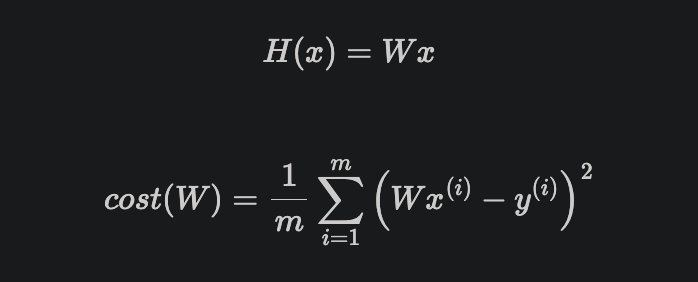

In [2]:
from IPython.display import Image
Image(filename='../images/theoretical.png') 

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [4]:
torch.manual_seed(1)

#### Data
- we will use fake data for this example

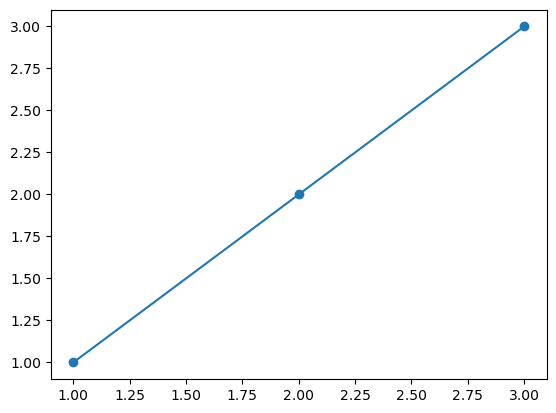

In [6]:
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[1], [2], [3]])

# Data 
plt.scatter(x_train, y_train)
xs = np.linspace(1, 3, 100)
plt.plot(xs, xs)

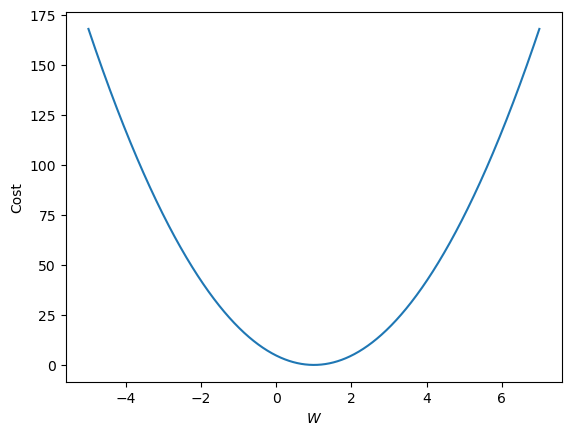

In [8]:
W_1 = np.linspace(-5, 7, 1000)
cost_1 = []
for W in W_1:
    hypothesis = W * x_train
    cost = torch.mean((hypothesis - y_train)**2)
    cost_1.append(cost.item())
    
plt.plot(W_1, cost_1)
plt.xlabel('$W$')
plt.ylabel('Cost')
plt.show()

#### Gradient Descent by Hand

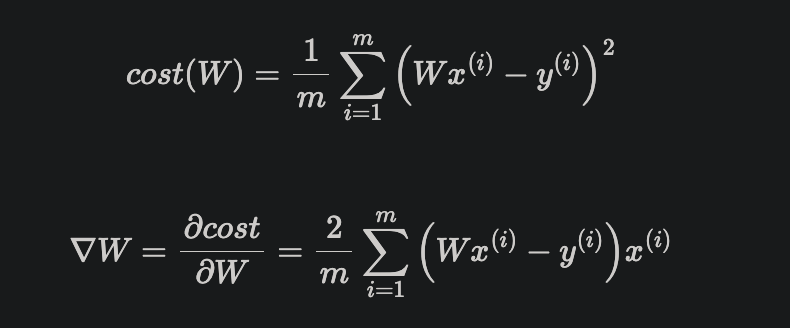

In [12]:
w = 0
Image(filename='../images/gradient_descent.png')

In [13]:
gradient = torch.sum((W * x_train - y_train) * x_train)
gradient

tensor(84.)

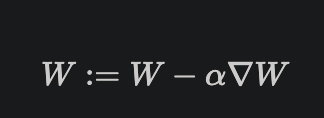

In [15]:
Image(filename='../images/deltaw.png')

In [16]:
lr = 0.1
W -= lr * gradient
W

tensor(-1.4000)

#### Training

In [19]:
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[1], [2], [3]])

W = torch.zeros(1)

lr = 0.1

nb_epochs = 5
for epoch in range(nb_epochs + 1):
    hypothesis = x_train * W
    
    cost = torch.mean((hypothesis - y_train)**2)
    gradient = torch.sum((W * x_train - y_train) * x_train)
    
    print (f'Epoch {epoch + 1}/{nb_epochs}, Cost: {cost}, Gradient: {gradient}')
    W -= lr * gradient

Epoch 1/5, Cost: 4.666666507720947, Gradient: -14.0
Epoch 2/5, Cost: 0.7466664910316467, Gradient: 5.59999942779541
Epoch 3/5, Cost: 0.11946665495634079, Gradient: -2.239999771118164
Epoch 4/5, Cost: 0.0191146582365036, Gradient: 0.8959997892379761
Epoch 5/5, Cost: 0.00305833644233644, Gradient: -0.3583993911743164
Epoch 6/5, Cost: 0.0004893290461041033, Gradient: 0.14335906505584717


#### Training with optim

In [21]:
x_train = torch.FloatTensor([[1], [2], [3]])   
y_train = torch.FloatTensor([[1], [2], [3]])

W = torch.zeros(1, requires_grad=True)
optimizer = optim.SGD([W], lr=0.15)

nb_epochs = 10
for epoch in range(nb_epochs + 1):
    hypothesis = x_train * W
    cost = torch.mean((hypothesis - y_train)**2)
    print("Epoch {:4d}/{} W: {:.3f} Cost: {:.6f}".format(
            epoch, nb_epochs, W.item(), cost.item()
        ))
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

Epoch    0/10 W: 0.000 Cost: 4.666667
Epoch    1/10 W: 1.400 Cost: 0.746667
Epoch    2/10 W: 0.840 Cost: 0.119467
Epoch    3/10 W: 1.064 Cost: 0.019115
Epoch    4/10 W: 0.974 Cost: 0.003058
Epoch    5/10 W: 1.010 Cost: 0.000489
Epoch    6/10 W: 0.996 Cost: 0.000078
Epoch    7/10 W: 1.002 Cost: 0.000013
Epoch    8/10 W: 0.999 Cost: 0.000002
Epoch    9/10 W: 1.000 Cost: 0.000000
Epoch   10/10 W: 1.000 Cost: 0.000000
